In [1]:
import librosa
import numpy as np
import pydelia
import matplotlib.pyplot as plt

sine_arr = [0.0,0.0569595,0.11373405,0.17013931,0.22599211,0.28111112,0.33531737,0.38843483,0.44029102,0.49071756,0.5395507,0.586632,0.63180846,0.6749334,0.7158668,0.7544758,0.790635,0.824227,0.8551427,0.88328177,0.9085528,0.93087375,0.9501721,0.96638525,0.97946054,0.98935544,0.9960379,0.9994862,0.99968916,0.9966461,0.9903669,0.980872,0.9681921,0.9523685,0.9334525,0.9115056,0.88659906,0.85881364,0.8282397,0.79497635,0.7591317,0.7208222,0.68017215,0.63731354,0.5923856,0.54553413,0.4969113,0.44667497,0.3949883,0.3420191,0.28793934,0.23292464,0.17715363,0.1208074,0.0640689,0.007122369,-0.04984729,-0.10665509,-0.16311659,-0.21904843,-0.274269,-0.32859907,-0.38186213,-0.43388528,-0.48449957,-0.5335407,-0.5808494,-0.6262721,-0.6696613,-0.710876,-0.7497825,-0.78625435,-0.82017314,-0.8514289,-0.87992007,-0.9055541,-0.92824787,-0.94792753,-0.96452934,-0.97799927,-0.9882937,-0.9953791,-0.99923253,-0.99984145,-0.9972038,-0.99132836,-0.98223406,-0.9699504,-0.9545173,-0.9359849,-0.9144134,-0.8898728,-0.86244273,-0.8322123,-0.79927975,-0.7637519,-0.7257442,-0.6853799,-0.6427903,-0.5981135,-0.5514946,-0.5030851,-0.45304197,-0.40152785,-0.34870997,-0.29475984,-0.2398526,-0.1841666,-0.12788258,-0.07118334,-0.014252959,0.04272352,0.09956165,0.15607649,0.21208456,0.267404,0.32185516,0.37526125,0.42744887,0.47824854,0.5274953,0.5750293,0.6206961,0.6643476,0.7058419,0.7450443,0.78182757,0.81607217]

sine = np.array(sine_arr)
result = librosa.stft(sine, n_fft=64, hop_length=16, window='hann', center=False)

print(result.shape)
print(len(sine))

def numpy_to_zig_complex_format(np_array):
    zig_str = "pub const stft_expected = [_][{1}]ComplexExpect{{\n".format(np_array.shape[0], np_array.shape[1])
    
    for row in np_array:
        zig_str += "    [_]ComplexExpect{\n"
        for val in row:
            zig_str += "        .{{ .re = {0}, .im = {1} }},\n".format(val.real, val.imag)
        zig_str += "    },\n"
    
    zig_str += "};"
    return zig_str

# Generate the Zig-formatted string
# zig_formatted_output = numpy_to_zig_complex_format(result)

# Print the Zig-formatted complex array

(33, 5)
128


In [2]:
import numpy as np

# Define a list of complex numbers using the complex type in Python
data = np.array([1 + 2j, 3 + 4j, 5 + 0j, 6 + 8j, 0 + 9j])

# Length of the array (number of complex numbers)
len_as_float = float(len(data))

# Normalize each complex number by dividing by a complex number (len_as_float + 0j)
length_complex = complex(len_as_float, 0)

# Perform complex division for each element
normalized_data = data / length_complex
print(len_as_float)

# Output the normalized array
normalized_data

5.0


array([0.2+0.4j, 0.6+0.8j, 1. +0.j , 1.2+1.6j, 0. +1.8j])

In [3]:
d = np.array(pydelia.stft(sine_arr, 64, 16))

d.shape, result.shape

((33, 5), (33, 5))

In [4]:
d[:,1]

array([ 0.6557217 +0.j        , -0.0073387 -0.54937188j,
       -0.17640193-0.11630269j, -0.03637271-0.09286889j,
       -0.01215929-0.07152674j, -0.00163305-0.05768569j,
        0.00372893-0.04749168j,  0.0064284 -0.04014132j,
        0.00817224-0.03486105j,  0.00956952-0.03062925j,
        0.01051403-0.02701062j,  0.01107334-0.02405308j,
        0.01153817-0.02165197j,  0.01198351-0.01953076j,
        0.01229572-0.01760023j,  0.01248773-0.01592818j,
        0.01267714-0.01447616j,  0.01287199-0.01312507j,
        0.0130044 -0.01185603j,  0.01308772-0.01071443j,
        0.0131818 -0.0096752j ,  0.01327926-0.00867769j,
        0.0133415 -0.00772248j,  0.01338184-0.00683577j,
        0.01343155-0.00599857j,  0.01348072-0.00517931j,
        0.01350945-0.00438285j,  0.01352826-0.00362115j,
        0.01355128-0.00288079j,  0.01357119-0.00214722j,
        0.01358074-0.00142306j,  0.01358516-0.00070961j,
        0.01358714+0.j        ])

In [5]:
result[:, 1]

array([ 1.01208533e+01+0.00000000e+00j, -6.45702618e+00-1.11913824e+01j,
        1.21845500e+00+3.45436420e+00j,  1.19820813e-01+4.92749808e-01j,
        3.19864984e-02+1.73372073e-01j,  1.22022853e-02+8.22231555e-02j,
        5.67151598e-03+4.57135357e-02j,  2.99594426e-03+2.81072642e-02j,
        1.73236204e-03+1.85362536e-02j,  1.07199727e-03+1.28731496e-02j,
        6.98803393e-04+9.30302215e-03j,  4.75309192e-04+6.93829987e-03j,
        3.34848874e-04+5.30789261e-03j,  2.42776687e-04+4.14656262e-03j,
        1.80426575e-04+3.29602961e-03j,  1.37139509e-04+2.65803743e-03j,
        1.06171307e-04+2.16945862e-03j,  8.36684705e-05+1.78851546e-03j,
        6.69251602e-05+1.48615682e-03j,  5.43118891e-05+1.24297295e-03j,
        4.47621510e-05+1.04419196e-03j,  3.72253472e-05+8.79553874e-04j,
        3.15292421e-05+7.41604366e-04j,  2.70601327e-05+6.24214505e-04j,
        2.33223799e-05+5.23193838e-04j,  2.06343388e-05+4.35128547e-04j,
        1.84044323e-05+3.56927809e-04j,  1.65684201

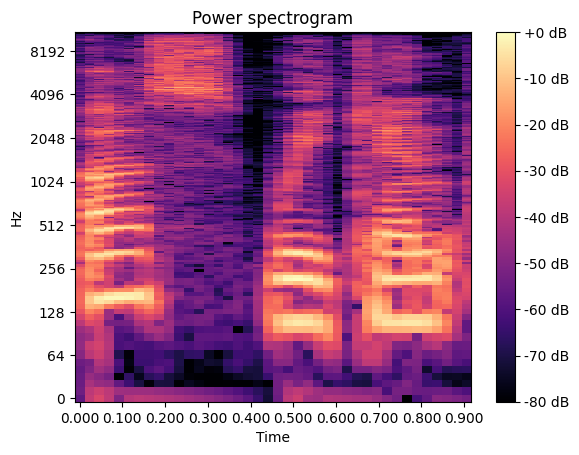

In [6]:
samples, sr = librosa.load('audio_examples/voice.wav')
audio = samples[int(1.0 * sr): (int(2.0 *sr))]

lmatrix = librosa.stft(audio, n_fft=2048, hop_length=2048//4, window='hann', center=False)

def plot(matrix):
    mags = np.abs(matrix)
    fig, ax = plt.subplots()
    img = librosa.display.specshow(librosa.amplitude_to_db(mags, ref=np.max), y_axis='log', x_axis='time', ax=ax)
    
    ax.set_title('Power spectrogram')
    fig.colorbar(img, ax=ax, format="%+2.0f dB")

plot(lmatrix)

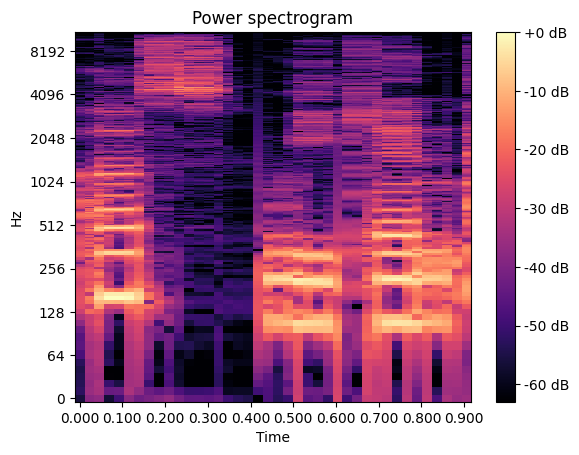

In [7]:
delia_matrix = pydelia.stft(audio.tolist(), 2048, 2048 // 4)
plot(delia_matrix)

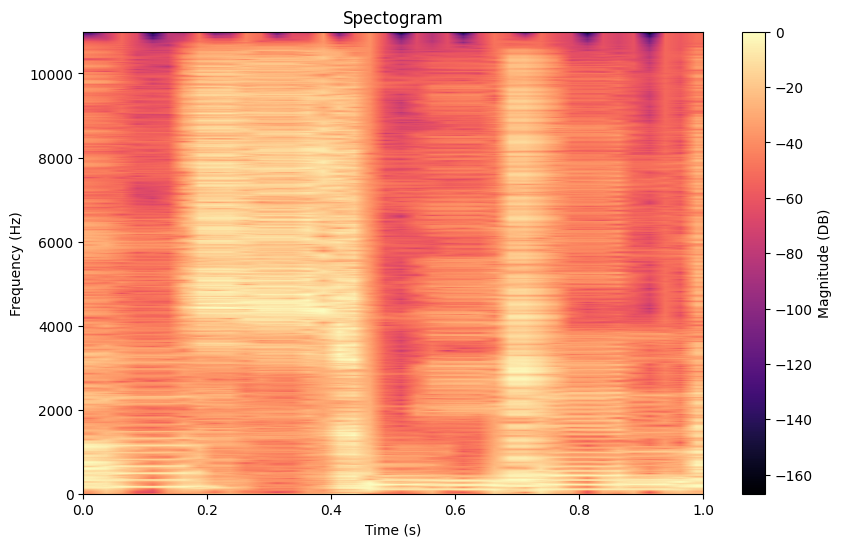

In [8]:
def plot_custo(matrix):
     matrix = np.array(matrix)
     rows, cols = matrix.shape
     spectro = np.zeros((rows, cols))

     for c in range(cols):
        row = matrix[:, c]
        
        row = pydelia.magnitude(row.tolist())
        row = pydelia.decibels_from_magnitude(row, np.max(row).item())
        spectro[:, c] = row 

     bins = pydelia.fft_frequencies(rows, sr)

     plt.figure(figsize=(10,6))
     plt.imshow(spectro,
             origin='lower',
             aspect='auto',
             interpolation='bilinear',
             
             # sets x axis to be between 0 and n_samples/sr seconds
             # and y axis to be between our frequency bins
             extent=[0, len(audio) / sr, bins[0], bins[len(bins)-1]],
             cmap='magma'
               )

     plt.colorbar(label="Magnitude (DB)")
     plt.title("Spectogram")
     plt.xlabel("Time (s)")
     plt.ylabel("Frequency (Hz)")
     plt.show()
    
    
plot_custo(delia_matrix)
    

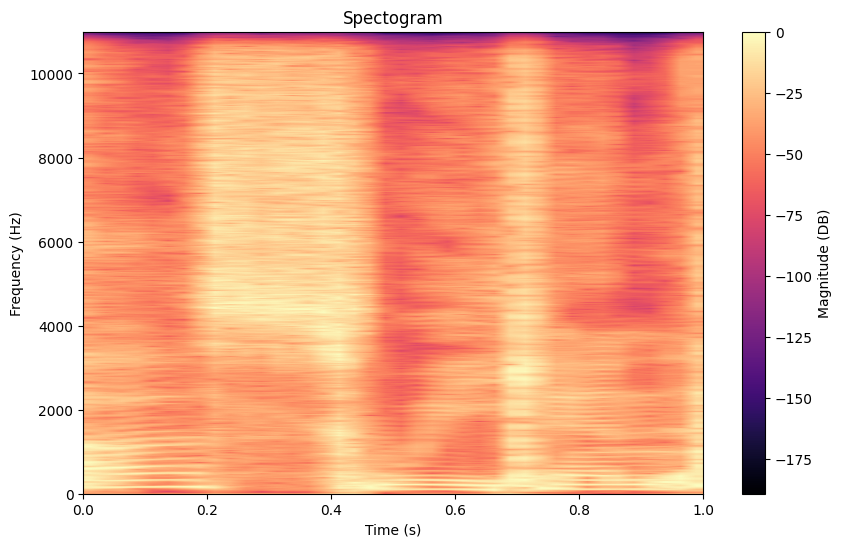

In [9]:
plot_custo(lmatrix)

In [18]:
np.max([0, 1, 2]).item()

2